In [1]:
#import dependencies
import os
import csv
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import requests
from scipy import stats
from scipy.stats import linregress


In [2]:



happy2015_df = pd.read_csv('2015.csv')
happy2016_df = pd.read_csv('2016.csv')
happy2017_df = pd.read_csv('2017.csv')
happy2018_df = pd.read_csv('2018.csv')
happy2019_df = pd.read_csv('2019.csv')
#the survey changed over the years, so we need to clean the data up.
norm2015_df = happy2015_df.drop(['Region', 'Standard Error', 'Dystopia Residual'], axis=1)
norm2015_df = norm2015_df[['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']]
norm2015_df.columns = ["Country or Region", "Happiness Rank", "Happiness Score", "GDP per Capita", "Social Support", "Healthy Life Expectancy", "Freedom", "Trust", "Generosity"]

norm2016_df = happy2016_df.drop(['Region','Lower Confidence Interval', 'Upper Confidence Interval', 'Dystopia Residual'], axis=1)
norm2016_df = norm2016_df[['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']]
norm2016_df.columns = ["Country or Region", "Happiness Rank", "Happiness Score", "GDP per Capita", "Social Support", "Healthy Life Expectancy", "Freedom", "Trust", "Generosity"]

norm2017_df = happy2017_df.drop(['Whisker.high', 'Whisker.low', 'Dystopia.Residual'], axis=1)
norm2017_df = norm2017_df[['Country', 'Happiness.Rank', 'Happiness.Score', 'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.', 'Freedom', 'Trust..Government.Corruption.', 'Generosity']]
norm2017_df.columns = ["Country or Region", "Happiness Rank", "Happiness Score", "GDP per Capita", "Social Support", "Healthy Life Expectancy", "Freedom", "Trust", "Generosity"]

#norm2015_df = norm2015_df[['Country', 'Happiness Rank', 'Happiness Score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']]

#happy2018_df.head()
norm2018_df = happy2018_df[['Country or region', 'Overall rank', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption', 'Generosity']]
norm2018_df.columns = ["Country or Region", "Happiness Rank", "Happiness Score", "GDP per Capita", "Social Support", "Healthy Life Expectancy", "Freedom", "Trust", "Generosity"]
#norm2018_df
norm2019_df = happy2019_df[['Country or region', 'Overall rank', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Perceptions of corruption', 'Generosity']]
norm2019_df.columns = ["Country or Region", "Happiness Rank", "Happiness Score", "GDP per Capita", "Social Support", "Healthy Life Expectancy", "Freedom", "Trust", "Generosity"]
norm2019_df

,Country or Region,Happiness Rank,Happiness Score,GDP per Capita,Social Support,Healthy Life Expectancy,Freedom,Trust,Generosity
0,Finland,1,7.769,1.340,1.587,0.986,0.596,0.393,0.153
1,Denmark,2,7.600,1.383,1.573,0.996,0.592,0.410,0.252
2,Norway,3,7.554,1.488,1.582,1.028,0.603,0.341,0.271
3,Iceland,4,7.494,1.380,1.624,1.026,0.591,0.118,0.354
4,Netherlands,5,7.488,1.396,1.522,0.999,0.557,0.298,0.322
...,...,...,...,...,...,...,...,...,...
151,Rwanda,152,3.334,0.359,0.711,0.614,0.555,0.411,0.217
152,Tanzania,153,3.231,0.476,0.885,0.499,0.417,0.147,0.276
153,Afghanistan,154,3.203,0.350,0.517,0.361,0.000,0.025,0.158
154,Central African Republic,155,3.083,0.026,0.000,0.105,0.225,0.035,0.235


In [3]:
# setting up the 5 df (one for each year)for an easy merge of years just with the varaibles TRUST
#2015 Trust
country_rank_trust_2015 = norm2015_df[["Country or Region", "Happiness Rank", "Happiness Score","Trust"]]
country_rank_trust_2015 = country_rank_trust_2015.set_index("Country or Region")
#2016 Trust
country_rank_trust_2016 = norm2016_df[["Country or Region", "Happiness Rank", "Happiness Score","Trust"]]
country_rank_trust_2016 = country_rank_trust_2016.set_index("Country or Region")
#2017 Trust
country_rank_trust_2017 = norm2017_df[["Country or Region", "Happiness Rank", "Happiness Score","Trust"]]
country_rank_trust_2017 = country_rank_trust_2017.set_index("Country or Region")
#2018 Trust
country_rank_trust_2018 = norm2018_df[["Country or Region", "Happiness Rank", "Happiness Score","Trust"]]
country_rank_trust_2018 = country_rank_trust_2018.set_index("Country or Region")
#2019 Trust
country_rank_trust_2019 = norm2019_df[["Country or Region", "Happiness Rank", "Happiness Score","Trust"]]
country_rank_trust_2019 = country_rank_trust_2019.set_index("Country or Region")


In [4]:
# setting up the 5 df (one for each year)for an easy merge of years just with the varaibles LIFE EXPECTANCY
#2015 LIFE EXPECTANCY (LE)
country_rank_LE_2015 = norm2015_df[["Country or Region", "Happiness Rank", "Happiness Score","Healthy Life Expectancy"]]
country_rank_LE_2015 = country_rank_LE_2015.set_index("Country or Region")
#2016 LIFE EXPECTANCY (LE)
country_rank_LE_2016 = norm2016_df[["Country or Region", "Happiness Rank", "Happiness Score","Healthy Life Expectancy"]]
country_rank_LE_2016 = country_rank_LE_2016.set_index("Country or Region")
#2017 LIFE EXPECTANCY (LE)
country_rank_LE_2017 = norm2017_df[["Country or Region", "Happiness Rank", "Happiness Score","Healthy Life Expectancy"]]
country_rank_LE_2017 = country_rank_LE_2017.set_index("Country or Region")
#2018 LIFE EXPECTANCY (LE)
country_rank_LE_2018 = norm2018_df[["Country or Region", "Happiness Rank", "Happiness Score","Healthy Life Expectancy"]]
country_rank_LE_2018 = country_rank_LE_2018.set_index("Country or Region")
#2019 LIFE EXPECTANCY (LE)
country_rank_LE_2019 = norm2019_df[["Country or Region", "Happiness Rank", "Happiness Score","Healthy Life Expectancy"]]
country_rank_LE_2019 = country_rank_LE_2019.set_index("Country or Region")


In [5]:
# merging the dataframes for TRUST
trust_2015and2016 = country_rank_trust_2015.merge(country_rank_trust_2016, on="Country or Region")
trust_2015and2016_2017 = trust_2015and2016.merge(country_rank_trust_2017, on="Country or Region")
trust_2015and2016_2017_2018 = trust_2015and2016_2017.merge(country_rank_trust_2018, on="Country or Region")
trust_merged = trust_2015and2016_2017_2018.merge(country_rank_trust_2019, on="Country or Region")
trust_merged.columns = ["Happiness Rank 2015", "Happiness Score 2015", "Trust 2015", "Happiness Rank 2016", "Happiness Score 2016", "Trust 2016","Happiness Rank 2017", "Happiness Score 2017", "Trust 2017","Happiness Rank 2018", "Happiness Score 2018", "Trust 2018","Happiness Rank 2019", "Happiness Score 2019", "Trust 2019"]
trust_merged

,Happiness Rank 2015,Happiness Score 2015,Trust 2015,Happiness Rank 2016,Happiness Score 2016,Trust 2016,Happiness Rank 2017,Happiness Score 2017,Trust 2017,Happiness Rank 2018,Happiness Score 2018,Trust 2018,Happiness Rank 2019,Happiness Score 2019,Trust 2019
Country or Region,,,,,,,,,,,,,,,
Switzerland,1,7.587,0.41978,2,7.509,0.41203,4,7.494,0.367007,5,7.487,0.357,6,7.480,0.343
Iceland,2,7.561,0.14145,3,7.501,0.14975,3,7.504,0.153527,4,7.495,0.138,4,7.494,0.118
Denmark,3,7.527,0.48357,1,7.526,0.44453,2,7.522,0.400770,3,7.555,0.408,2,7.600,0.410
Norway,4,7.522,0.36503,4,7.498,0.35776,1,7.537,0.315964,2,7.594,0.340,3,7.554,0.341
Canada,5,7.427,0.32957,6,7.404,0.31329,7,7.316,0.287372,7,7.328,0.291,9,7.278,0.308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rwanda,154,3.465,0.55191,152,3.515,0.50521,151,3.471,0.455220,151,3.408,0.444,152,3.334,0.411
Benin,155,3.340,0.08010,153,3.484,0.06681,143,3.657,0.060929,136,4.141,0.067,102,4.883,0.082
Syria,156,3.006,0.18906,156,3.069,0.17233,152,3.462,0.151347,150,3.462,0.144,149,3.462,0.141


In [6]:
# merging the dataframes for Life Expectancy
le_2015and2016 = country_rank_LE_2015.merge(country_rank_LE_2016, on="Country or Region")
le_2015and2016_2017 = le_2015and2016.merge(country_rank_LE_2017, on="Country or Region")
le_2015and2016_2017_2018 = le_2015and2016_2017.merge(country_rank_LE_2018, on="Country or Region")
le_merged = le_2015and2016_2017_2018.merge(country_rank_LE_2019, on="Country or Region")
le_merged.columns = ["Happiness Rank 2015", "Happiness Score 2015", "Healthy Life Expectancy 2015", "Happiness Rank 2016", "Happiness Score 2016", "Healthy Life Expectancy 2016","Happiness Rank 2017", "Happiness Score 2017", "Healthy Life Expectancy 2017","Happiness Rank 2018", "Happiness Score 2018", "Healthy Life Expectancy 2018","Happiness Rank 2019", "Happiness Score 2019", "Healthy Life Expectancy 2019"]
le_merged

,Happiness Rank 2015,Happiness Score 2015,Healthy Life Expectancy 2015,Happiness Rank 2016,Happiness Score 2016,Healthy Life Expectancy 2016,Happiness Rank 2017,Happiness Score 2017,Healthy Life Expectancy 2017,Happiness Rank 2018,Happiness Score 2018,Healthy Life Expectancy 2018,Happiness Rank 2019,Happiness Score 2019,Healthy Life Expectancy 2019
Country or Region,,,,,,,,,,,,,,,
Switzerland,1,7.587,0.94143,2,7.509,0.86303,4,7.494,0.858131,5,7.487,0.927,6,7.480,1.052
Iceland,2,7.561,0.94784,3,7.501,0.86733,3,7.504,0.833552,4,7.495,0.914,4,7.494,1.026
Denmark,3,7.527,0.87464,1,7.526,0.79504,2,7.522,0.792566,3,7.555,0.868,2,7.600,0.996
Norway,4,7.522,0.88521,4,7.498,0.79579,1,7.537,0.796667,2,7.594,0.861,3,7.554,1.028
Canada,5,7.427,0.90563,6,7.404,0.82760,7,7.316,0.834558,7,7.328,0.896,9,7.278,1.039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rwanda,154,3.465,0.42864,152,3.515,0.31865,151,3.471,0.326425,151,3.408,0.400,152,3.334,0.614
Benin,155,3.340,0.31910,153,3.484,0.21028,143,3.657,0.209930,136,4.141,0.240,102,4.883,0.397
Syria,156,3.006,0.72193,156,3.069,0.62994,152,3.462,0.500533,150,3.462,0.539,149,3.462,0.440


In [7]:
# looking at summary statistics for LIFE EXPECTANCY
le_merged.describe()


,Happiness Rank 2015,Happiness Score 2015,Healthy Life Expectancy 2015,Happiness Rank 2016,Happiness Score 2016,Healthy Life Expectancy 2016,Happiness Rank 2017,Happiness Score 2017,Healthy Life Expectancy 2017,Happiness Rank 2018,Happiness Score 2018,Healthy Life Expectancy 2018,Happiness Rank 2019,Happiness Score 2019,Healthy Life Expectancy 2019
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,78.276596,5.406716,0.648851,78.304965,5.397887,0.567795,76.007092,5.408291,0.568714,76.106383,5.440156,0.615035,75.553191,5.485383,0.746965
std,46.535410,1.169844,0.231794,45.967837,1.159746,0.222867,44.825773,1.122669,0.220529,44.867854,1.110110,0.233132,44.750966,1.096099,0.219697
min,1.000000,2.839000,0.000000,1.000000,2.905000,0.000000,1.000000,2.905000,0.005565,1.000000,2.905000,0.000000,1.000000,3.203000,0.192000
25%,37.000000,4.518000,0.515290,38.000000,4.404000,0.424940,37.000000,4.535000,0.429783,37.000000,4.559000,0.457000,37.000000,4.628000,0.581000
50%,77.000000,5.286000,0.708060,79.000000,5.314000,0.618040,76.000000,5.311000,0.617144,75.000000,5.472000,0.669000,74.000000,5.467000,0.802000
75%,119.000000,6.302000,0.813250,118.000000,6.355000,0.729930,115.000000,6.344000,0.726798,114.000000,6.260000,0.781000,114.000000,6.199000,0.884000
max,158.000000,7.587000,1.025250,157.000000,7.526000,0.947190,154.000000,7.537000,0.949492,156.000000,7.632000,1.008000,154.000000,7.769000,1.141000


In [8]:
# looking at summary statistics for LIFE TRUST
trust_merged.describe()

,Happiness Rank 2015,Happiness Score 2015,Trust 2015,Happiness Rank 2016,Happiness Score 2016,Trust 2016,Happiness Rank 2017,Happiness Score 2017,Trust 2017,Happiness Rank 2018,Happiness Score 2018,Trust 2018,Happiness Rank 2019,Happiness Score 2019,Trust 2019
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,140.000000,141.000000,141.000000,141.000000
mean,78.276596,5.406716,0.140460,78.304965,5.397887,0.135538,76.007092,5.408291,0.123388,76.106383,5.440156,0.111429,75.553191,5.485383,0.109440
std,46.535410,1.169844,0.120327,45.967837,1.159746,0.112282,44.825773,1.122669,0.103588,44.867854,1.110110,0.098181,44.750966,1.096099,0.096107
min,1.000000,2.839000,0.000000,1.000000,2.905000,0.000000,1.000000,2.905000,0.000000,1.000000,2.905000,0.000000,1.000000,3.203000,0.000000
25%,37.000000,4.518000,0.059890,38.000000,4.404000,0.055700,37.000000,4.535000,0.056767,37.000000,4.559000,0.050000,37.000000,4.628000,0.047000
50%,77.000000,5.286000,0.105010,79.000000,5.314000,0.103390,76.000000,5.311000,0.088174,75.000000,5.472000,0.081500,74.000000,5.467000,0.082000
75%,119.000000,6.302000,0.175210,118.000000,6.355000,0.174570,115.000000,6.344000,0.153066,114.000000,6.260000,0.135250,114.000000,6.199000,0.140000
max,158.000000,7.587000,0.551910,157.000000,7.526000,0.505210,154.000000,7.537000,0.464308,156.000000,7.632000,0.457000,154.000000,7.769000,0.453000


In [9]:
#create a function to generate scatter plots
def plotting_happiness(x_values, y_values, x_label, y_label, chart_title):
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    plt.title(chart_title)
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(6,6),fontsize=8,color="p")
    plt.show()

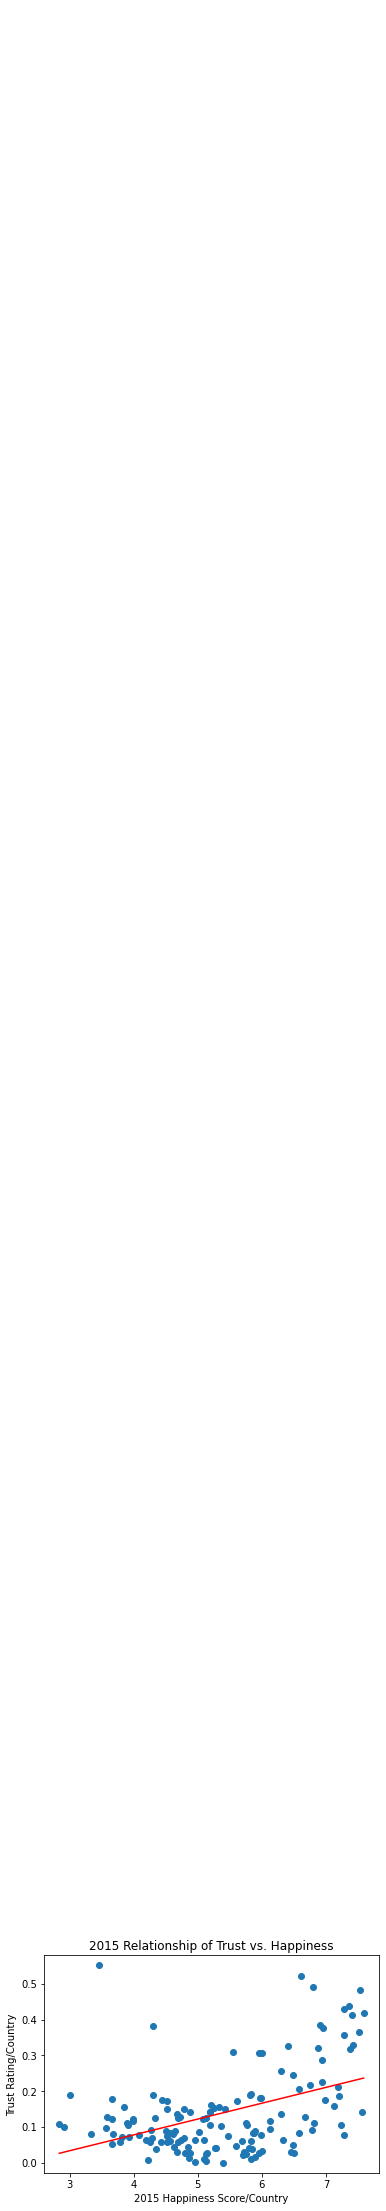

In [10]:
# Create a Scatter Plot for trust vs happiness scores 2015
y_values = trust_merged['Trust 2015']
x_values = trust_merged['Happiness Score 2015']
x_label = "2015 Happiness Score/Country"
y_label = "Trust Rating/Country"
chart_title = "2015 Relationship of Trust vs. Happiness"
plotting_happiness(x_values, y_values, x_label, y_label, chart_title)


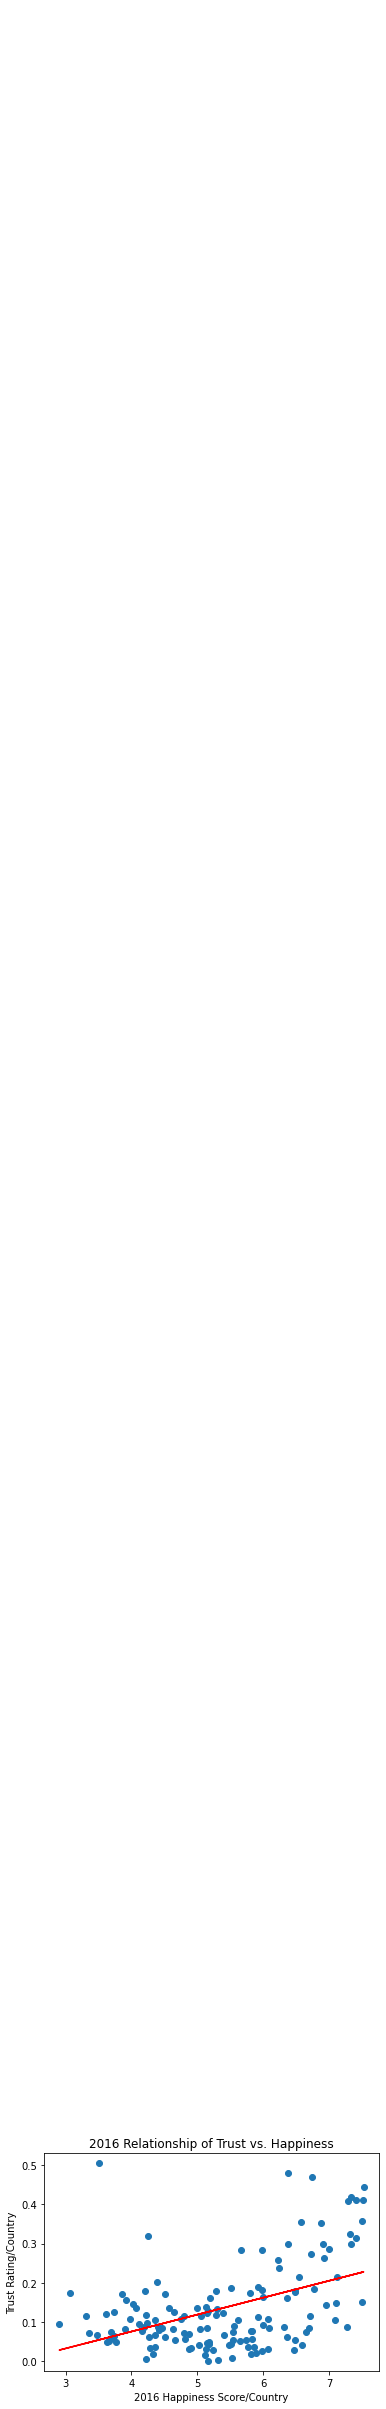

In [11]:
# Create a Scatter Plot for trust vs happiness scores 2016
y_values = trust_merged['Trust 2016']
x_values = trust_merged['Happiness Score 2016']
x_label = "2016 Happiness Score/Country"
y_label = "Trust Rating/Country"
chart_title = "2016 Relationship of Trust vs. Happiness"
plotting_happiness(x_values, y_values, x_label, y_label, chart_title)

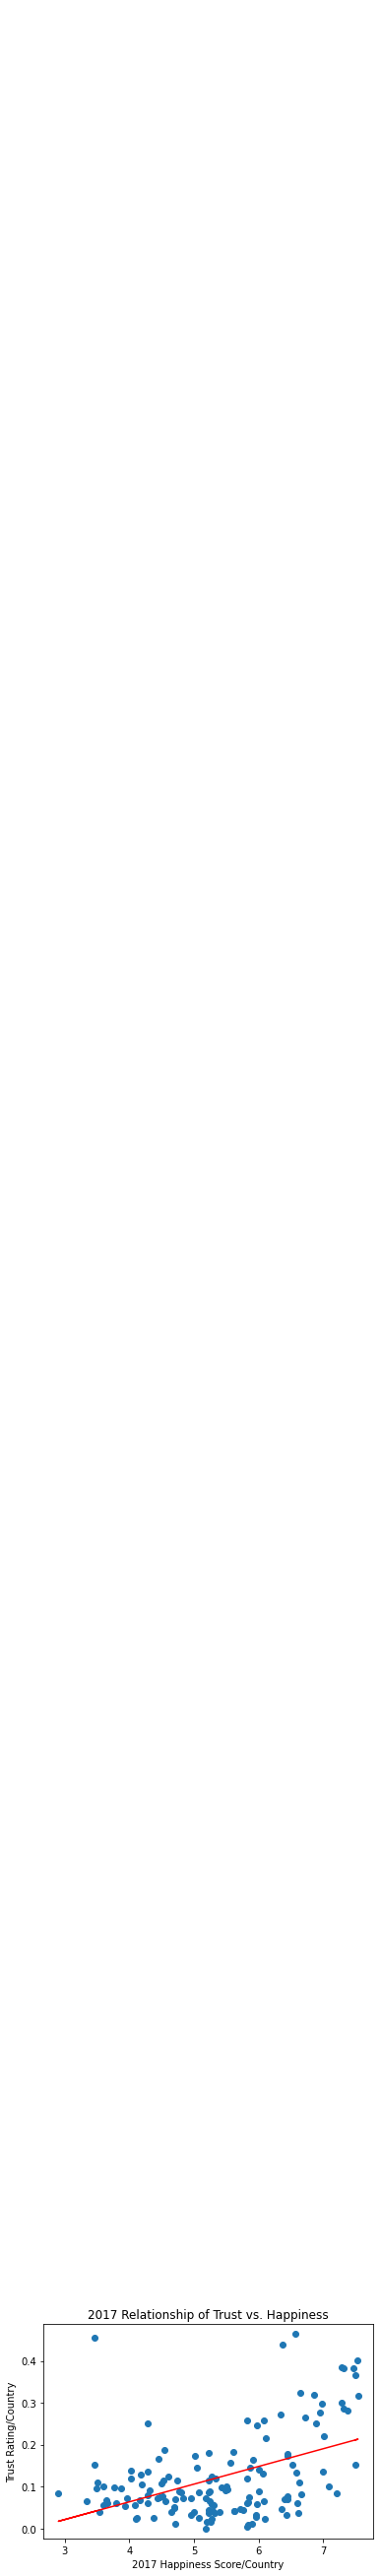

In [12]:
# Create a Scatter Plot for trust vs happiness scores 2017
y_values = trust_merged['Trust 2017']
x_values = trust_merged['Happiness Score 2017']
x_label = "2017 Happiness Score/Country"
y_label = "Trust Rating/Country"
chart_title = "2017 Relationship of Trust vs. Happiness"
plotting_happiness(x_values, y_values, x_label, y_label, chart_title)

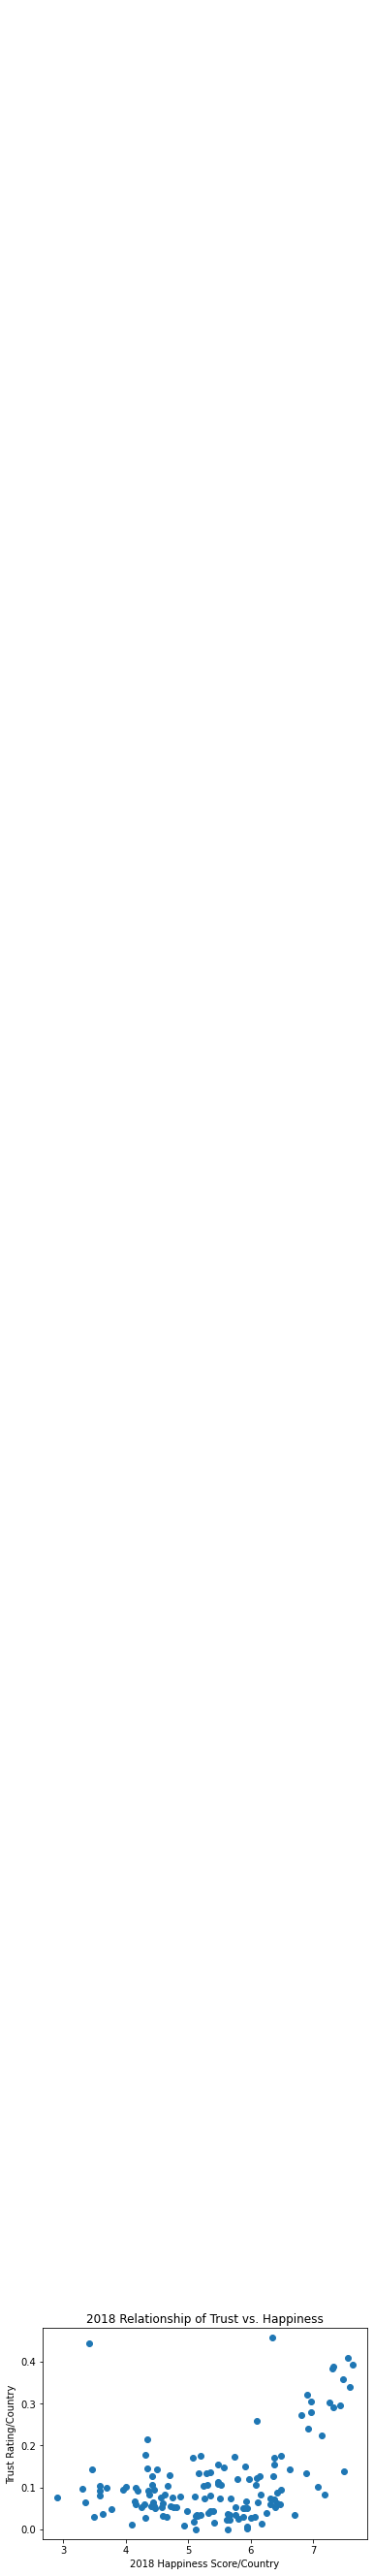

In [13]:
# Create a Scatter Plot for trust vs happiness scores 2018
y_values = trust_merged['Trust 2018']
x_values = trust_merged['Happiness Score 2018']
x_label = "2018 Happiness Score/Country"
y_label = "Trust Rating/Country"
chart_title = "2018 Relationship of Trust vs. Happiness"
plotting_happiness(x_values, y_values, x_label, y_label, chart_title)

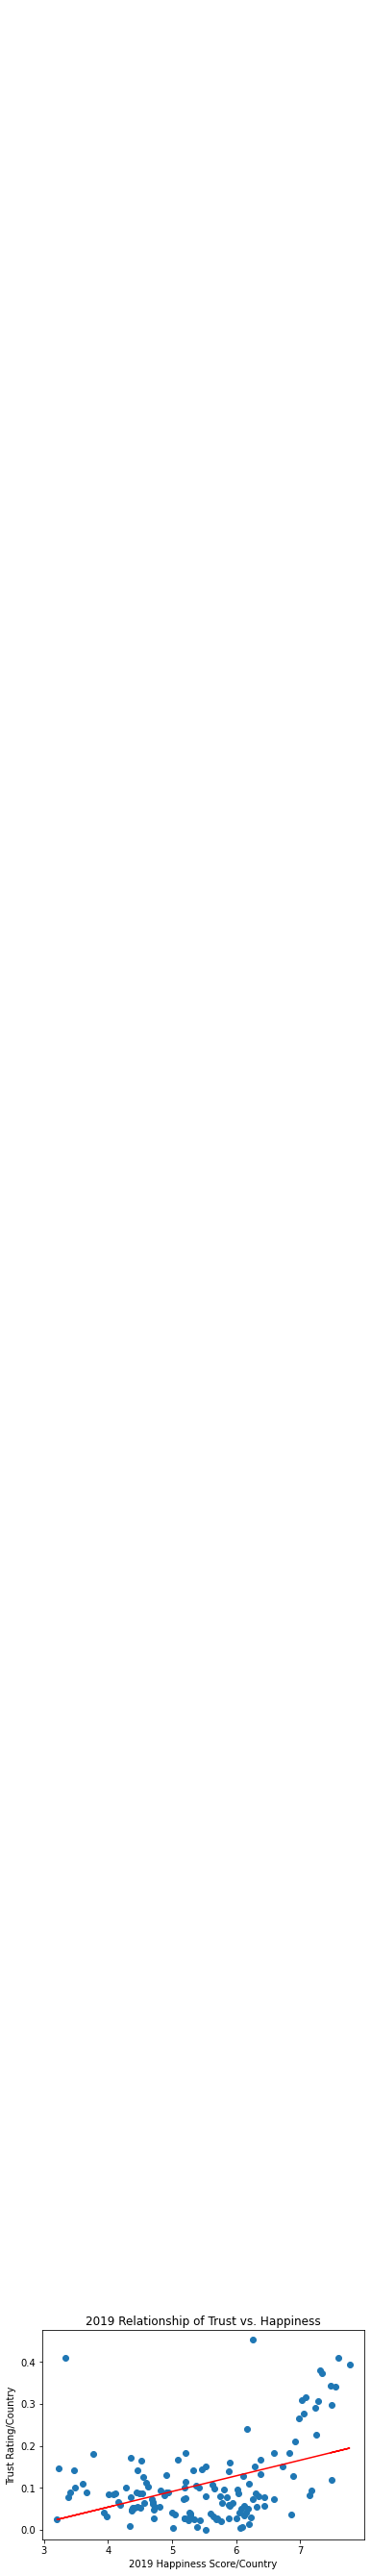

In [14]:
# Create a Scatter Plot for trust vs happiness scores 2019
y_values = trust_merged['Trust 2019']
x_values = trust_merged['Happiness Score 2019']
x_label = "2019 Happiness Score/Country"
y_label = "Trust Rating/Country"
chart_title = "2019 Relationship of Trust vs. Happiness"
plotting_happiness(x_values, y_values, x_label, y_label, chart_title)

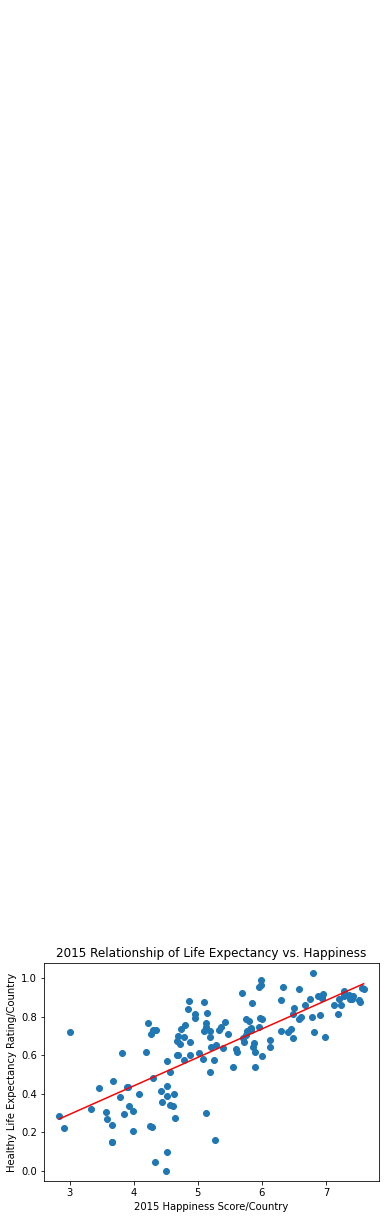

In [15]:
# Create a Scatter Plot for Life Expectancy vs happiness scores 2015
y_values = le_merged['Healthy Life Expectancy 2015']
x_values = le_merged['Happiness Score 2015']
x_label = "2015 Happiness Score/Country"
y_label = "Healthy Life Expectancy Rating/Country"
chart_title = "2015 Relationship of Life Expectancy vs. Happiness"
plotting_happiness(x_values, y_values, x_label, y_label, chart_title)

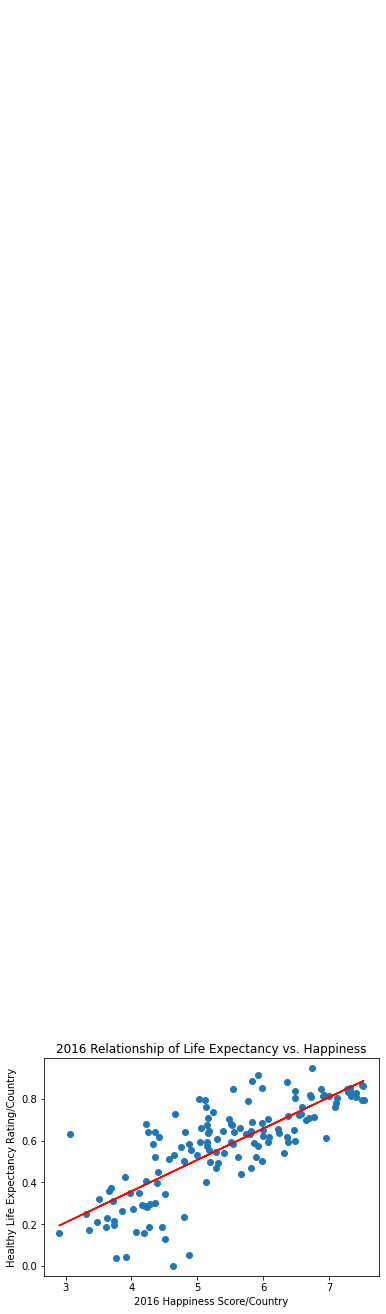

In [16]:
# Create a Scatter Plot for Life Expectancy vs happiness scores 2016
y_values = le_merged['Healthy Life Expectancy 2016']
x_values = le_merged['Happiness Score 2016']
x_label = "2016 Happiness Score/Country"
y_label = "Healthy Life Expectancy Rating/Country"
chart_title = "2016 Relationship of Life Expectancy vs. Happiness"
plotting_happiness(x_values, y_values, x_label, y_label, chart_title)

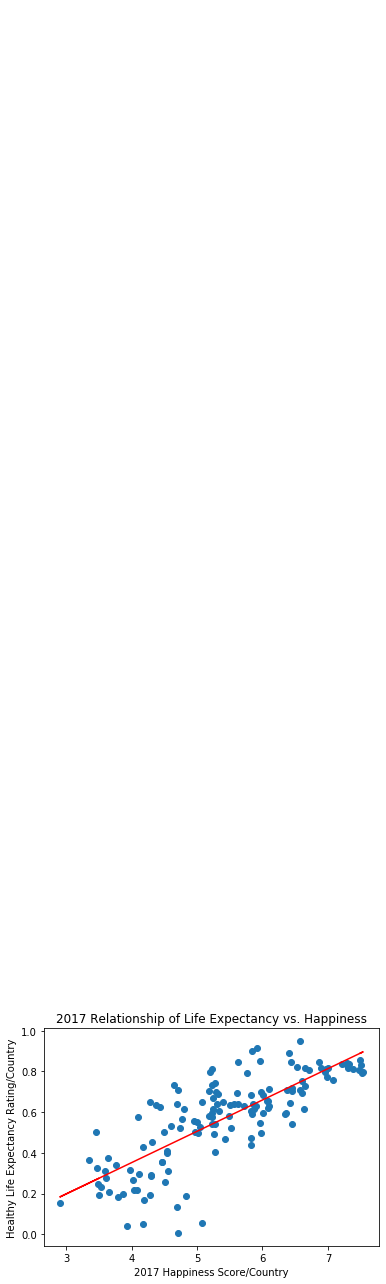

In [26]:
# Create a Scatter Plot for Life Expectancy vs happiness scores 2017
y_values = le_merged['Healthy Life Expectancy 2017']
x_values = le_merged['Happiness Score 2017']
x_label = "2017 Happiness Score/Country"
y_label = "Healthy Life Expectancy Rating/Country"
chart_title = "2017 Relationship of Life Expectancy vs. Happiness"
plotting_happiness(x_values, y_values, x_label, y_label, chart_title)

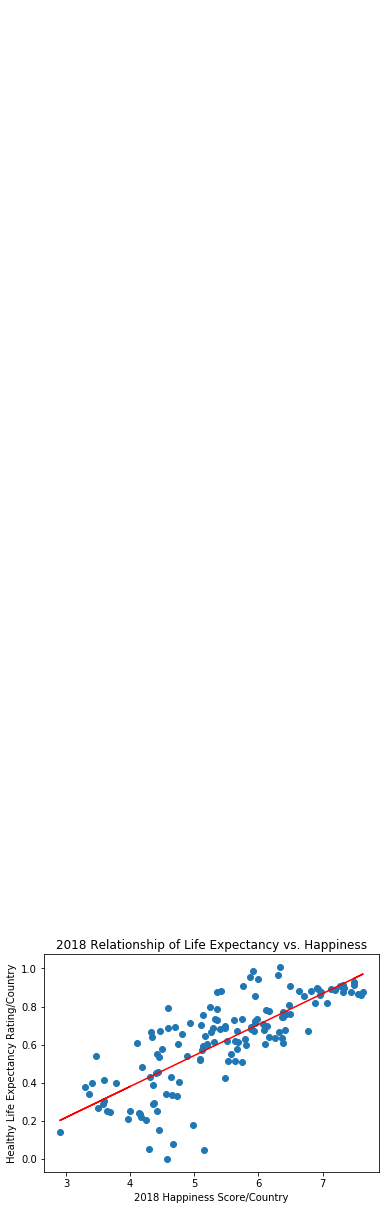

In [27]:
# Create a Scatter Plot for Life Expectancy vs happiness scores 2018
y_values = le_merged['Healthy Life Expectancy 2018']
x_values = le_merged['Happiness Score 2018']
x_label = "2018 Happiness Score/Country"
y_label = "Healthy Life Expectancy Rating/Country"
chart_title = "2018 Relationship of Life Expectancy vs. Happiness"
plotting_happiness(x_values, y_values, x_label, y_label, chart_title)

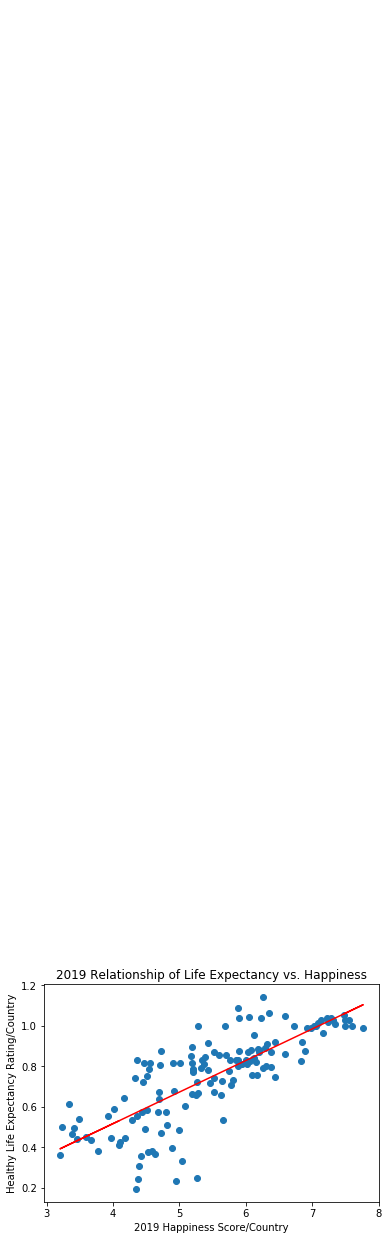

In [28]:
# Create a Scatter Plot for Life Expectancy vs happiness scores 2019
y_values = le_merged['Healthy Life Expectancy 2019']
x_values = le_merged['Happiness Score 2019']
x_label = "2019 Happiness Score/Country"
y_label = "Healthy Life Expectancy Rating/Country"
chart_title = "2019 Relationship of Life Expectancy vs. Happiness"
plotting_happiness(x_values, y_values, x_label, y_label, chart_title)

In [17]:
#RF-setting up the 5 df (one for each year)for an easy merge of years just with the varaibles Generosity
#2015 Generosity
country_rank_Generosity_2015 = norm2015_df[["Country or Region", 
                                            "Happiness Rank", 
                                            "Happiness Score",
                                            "Generosity"]]
country_rank_Generosity_2015 = country_rank_Generosity_2015.set_index("Country or Region")
#2016 Generosity
country_rank_Generosity_2016 = norm2016_df[["Country or Region", 
                                            "Happiness Rank", 
                                            "Happiness Score",
                                            "Generosity"]]
country_rank_Generosity_2016 = country_rank_Generosity_2016.set_index("Country or Region")
#2017 Generosity
country_rank_Generosity_2017 = norm2017_df[["Country or Region", 
                                            "Happiness Rank", 
                                            "Happiness Score",
                                            "Generosity"]]
country_rank_Generosity_2017 = country_rank_Generosity_2017.set_index("Country or Region")
#2018 Generosity
country_rank_Generosity_2018 = norm2018_df[["Country or Region", 
                                            "Happiness Rank", 
                                            "Happiness Score",
                                            "Generosity"]]
country_rank_Generosity_2018 = country_rank_Generosity_2018.set_index("Country or Region")
#2019 Generosity
country_rank_Generosity_2019 = norm2019_df[["Country or Region", 
                                            "Happiness Rank", 
                                            "Happiness Score",
                                            "Generosity"]]
country_rank_Generosity_2019 = country_rank_Generosity_2019.set_index("Country or Region")


In [22]:
#RF-merging the dataframes for Generosity
Generosity_2015and2016 = country_rank_Generosity_2015.merge(country_rank_Generosity_2016, on="Country or Region")
Generosity_2015and2016_2017 = Generosity_2015and2016.merge(country_rank_Generosity_2017, on="Country or Region")
Generosity_2015and2016_2017_2018 = Generosity_2015and2016_2017.merge(country_rank_Generosity_2018, on="Country or Region")
Generosity_merged = Generosity_2015and2016_2017_2018.merge(country_rank_Generosity_2019, on="Country or Region")
Generosity_merged.columns = ["Happiness Rank 2015", 
                             "Happiness Score 2015", 
                             "Generosity 2015", 
                             "Happiness Rank 2016", 
                             "Happiness Score 2016", 
                             "Generosity 2016",
                             "Happiness Rank 2017", 
                             "Happiness Score 2017", 
                             "Generosity 2017",
                             "Happiness Rank 2018", 
                             "Happiness Score 2018", 
                             "Generosity 2018",
                             "Happiness Rank 2019", 
                             "Happiness Score 2019", 
                             "Generosity 2019"]
Generosity_merged
#norm2015_df to QC check data 

,Happiness Rank 2015,Happiness Score 2015,Generosity 2015,Happiness Rank 2016,Happiness Score 2016,Generosity 2016,Happiness Rank 2017,Happiness Score 2017,Generosity 2017,Happiness Rank 2018,Happiness Score 2018,Generosity 2018,Happiness Rank 2019,Happiness Score 2019,Generosity 2019
Country or Region,,,,,,,,,,,,,,,
Switzerland,1,7.587,0.29678,2,7.509,0.28083,4,7.494,0.290549,5,7.487,0.256,6,7.480,0.263
Iceland,2,7.561,0.43630,3,7.501,0.47678,3,7.504,0.475540,4,7.495,0.353,4,7.494,0.354
Denmark,3,7.527,0.34139,1,7.526,0.36171,2,7.522,0.355280,3,7.555,0.284,2,7.600,0.252
Norway,4,7.522,0.34699,4,7.498,0.37895,1,7.537,0.362012,2,7.594,0.286,3,7.554,0.271
Canada,5,7.427,0.45811,6,7.404,0.44834,7,7.316,0.435540,7,7.328,0.321,9,7.278,0.285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Rwanda,154,3.465,0.22628,152,3.515,0.23552,151,3.471,0.252756,151,3.408,0.200,152,3.334,0.217
Benin,155,3.340,0.18260,153,3.484,0.20180,143,3.657,0.207948,136,4.141,0.163,102,4.883,0.175
Syria,156,3.006,0.47179,156,3.069,0.48397,152,3.462,0.493664,150,3.462,0.376,149,3.462,0.331


In [45]:
#RF-Determine if there are any potential outliers in the average Generosity 2015 in World Happiness
quartiles = Generosity_merged['Generosity 2015'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Generosity 2015 is: {lowerq}")
print(f"The upper quartile of Generosity 2015 is: {upperq}")
print(f"The interquartile range of Generosity 2015 is: {iqr}")
print(f"The the median of Generosity 2015 is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


# With the potential outliers, what is the lowest and highest median Generosity observed?
print(f"The minimum median Generosity of the potential outliers is {outlier_Generosity_2015['Generosity 2015'].min()}")
print(f"The maximum median Generosity of the potential outliers is {outlier_Generosity_2015['Generosity 2015'].max()}")

outlier_Generosity_2015 = Generosity_merged.loc[(Generosity_merged['Generosity 2015'] < lower_bound) | (Generosity_merged['Generosity 2015'] > upper_bound)]
outlier_Generosity_2015


The lower quartile of Generosity 2015 is: 0.14074
The upper quartile of Generosity 2015 is: 0.31105
The interquartile range of Generosity 2015 is: 0.17031
The the median of Generosity 2015 is: 0.21488000000000002 
Values below -0.114725 could be outliers.
Values above 0.566515 could be outliers.
The minimum median Generosity of the potential outliers is 0.5763
The maximum median Generosity of the potential outliers is 0.79588


,Happiness Rank 2015,Happiness Score 2015,Generosity 2015,Happiness Rank 2016,Happiness Score 2016,Generosity 2016,Happiness Rank 2017,Happiness Score 2017,Generosity 2017,Happiness Rank 2018,Happiness Score 2018,Generosity 2018,Happiness Rank 2019,Happiness Score 2019,Generosity 2019
Country or Region,,,,,,,,,,,,,,,
Thailand,34,6.455,0.57630,33,6.474,0.58696,32,6.424,0.572123,46,6.072,0.364,52,6.008,0.359
Myanmar,129,4.307,0.79588,119,4.395,0.81971,114,4.545,0.838075,130,4.308,0.598,131,4.360,0.566


In [43]:
#RF-Determine if there are any potential outliers in the average Generosity 2016 in World Happiness
quartiles = Generosity_merged['Generosity 2016'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Generosity 2016 is: {lowerq}")
print(f"The upper quartile of Generosity 2016 is: {upperq}")
print(f"The interquartile range of Generosity 2016 is: {iqr}")
print(f"The the median of Generosity 2016 is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_Generosity_2016 = Generosity_merged.loc[(Generosity_merged['Generosity 2016'] < lower_bound) | (Generosity_merged['Generosity 2016'] > upper_bound)]
outlier_Generosity_2016

# With the potential outliers, what is the lowest and highest median Generosity observed?
print(f"The minimum median Generosity of the potential outliers is {outlier_Generosity_2016['Generosity 2016'].min()}")
print(f"The maximum median Generosity of the potential outliers is {outlier_Generosity_2016['Generosity 2016'].max()}")

The lower quartile of Generosity 2016 is: 0.14527
The upper quartile of Generosity 2016 is: 0.31185
The interquartile range of Generosity 2016 is: 0.16658
The the median of Generosity 2016 is: 0.21698 
Values below -0.1046 could be outliers.
Values above 0.56172 could be outliers.
The minimum median Generosity of the potential outliers is 0.56237
The maximum median Generosity of the potential outliers is 0.81971


In [42]:
#RF-Determine if there are any potential outliers in the average Generosity 2017 in World Happiness
quartiles = Generosity_merged['Generosity 2017'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Generosity 2017 is: {lowerq}")
print(f"The upper quartile of Generosity 2017 is: {upperq}")
print(f"The interquartile range of Generosity 2017 is: {iqr}")
print(f"The the median of Generosity 2017 is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_Generosity_2017 = Generosity_merged.loc[(Generosity_merged['Generosity 2017'] < lower_bound) | (Generosity_merged['Generosity 2017'] > upper_bound)]
outlier_Generosity_2017

# With the potential outliers, what is the lowest and highest median Generosity observed?
print(f"The minimum median Generosity of the potential outliers is {outlier_Generosity_2017['Generosity 2017'].min()}")
print(f"The maximum median Generosity of the potential outliers is {outlier_Generosity_2017['Generosity 2017'].max()}")

The lower quartile of Generosity 2017 is: 0.15207366645336198
The upper quartile of Generosity 2017 is: 0.3266624212265011
The interquartile range of Generosity 2017 is: 0.1745887547731391
The the median of Generosity 2017 is: 0.22867384552955602 
Values below -0.10980946570634667 could be outliers.
Values above 0.5885455533862097 could be outliers.
The minimum median Generosity of the potential outliers is 0.611704587936401
The maximum median Generosity of the potential outliers is 0.8380751609802249


In [41]:
#RF-Determine if there are any potential outliers in the average Generosity 2018 in World Happiness
quartiles = Generosity_merged['Generosity 2018'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Generosity 2018 is: {lowerq}")
print(f"The upper quartile of Generosity 2018 is: {upperq}")
print(f"The interquartile range of Generosity 2018 is: {iqr}")
print(f"The the median of Generosity 2018 is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_Generosity_2018 = Generosity_merged.loc[(Generosity_merged['Generosity 2018'] < lower_bound) | (Generosity_merged['Generosity 2018'] > upper_bound)]
outlier_Generosity_2018

# With the potential outliers, what is the lowest and highest median Generosity observed?
print(f"The minimum median Generosity of the potential outliers is {outlier_Generosity_2018['Generosity 2018'].min()}")
print(f"The maximum median Generosity of the potential outliers is {outlier_Generosity_2018['Generosity 2018'].max()}")

The lower quartile of Generosity 2018 is: 0.106
The upper quartile of Generosity 2018 is: 0.245
The interquartile range of Generosity 2018 is: 0.139
The the median of Generosity 2018 is: 0.172 
Values below -0.10250000000000002 could be outliers.
Values above 0.4535 could be outliers.
The minimum median Generosity of the potential outliers is 0.484
The maximum median Generosity of the potential outliers is 0.598


In [44]:
#RF-Determine if there are any potential outliers in the average Generosity 2019 in World Happiness
quartiles = Generosity_merged['Generosity 2019'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Generosity 2019 is: {lowerq}")
print(f"The upper quartile of Generosity 2019 is: {upperq}")
print(f"The interquartile range of Generosity 2019 is: {iqr}")
print(f"The the median of Generosity 2019 is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

outlier_Generosity_2019 = Generosity_merged.loc[(Generosity_merged['Generosity 2019'] < lower_bound) | (Generosity_merged['Generosity 2019'] > upper_bound)]
outlier_Generosity_2019

# With the potential outliers, what is the lowest and highest median Generosity observed?
print(f"The minimum median Generosity of the potential outliers is {outlier_Generosity_2019['Generosity 2019'].min()}")
print(f"The maximum median Generosity of the potential outliers is {outlier_Generosity_2019['Generosity 2019'].max()}")

The lower quartile of Generosity 2019 is: 0.10800000000000001
The upper quartile of Generosity 2019 is: 0.247
The interquartile range of Generosity 2019 is: 0.13899999999999998
The the median of Generosity 2019 is: 0.175 
Values below -0.10049999999999995 could be outliers.
Values above 0.45549999999999996 could be outliers.
The minimum median Generosity of the potential outliers is 0.498
The maximum median Generosity of the potential outliers is 0.5660000000000001
